In [1]:
# Help

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.tsa.statespace.sarimax as sarima

In [6]:
import statsmodels.tools.eval_measures as fa

In [7]:
import arch.univariate as arch

In [8]:
print(arch)

<module 'arch.univariate' from '/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/arch/univariate/__init__.py'>


In [9]:
import pandas_datareader as web

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [10]:
hdata = pd.read_csv("./Volatility-Trading-Analysis-Data.txt");

In [11]:
hdata

,Date,SPX.Open,SPX.High,SPX.Low,SPX.Close,SPX.Adjusted,SPXTR.Adjusted,VIX.Close,VX1.Settle,SKEW,BXM,PUT,VXTH,SPY.Adjusted,PHDG.Adjusted,PBP.Adjusted,PUTW.Adjusted
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,2183.919922,12.04,12.300,118.77,800.200012,923.60,108.80,111.166000,NaN,NaN,NaN
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,2186.600098,11.51,12.110,118.78,801.359985,925.10,108.93,111.401939,NaN,NaN,NaN
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2173.290039,12.14,12.380,117.27,797.549988,921.33,108.27,110.513351,NaN,NaN,NaN
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2178.800049,12.00,12.250,119.44,799.640015,924.05,108.54,111.024483,NaN,NaN,NaN
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,2177.679932,11.91,12.340,116.28,799.469971,923.72,108.48,110.930107,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,2018-06-25,2742.939941,2742.939941,2698.669922,2717.070068,2717.070068,5347.229980,17.33,16.325,134.66,1396.189941,1873.75,232.49,269.778778,28.086325,21.522589,29.400000
2890,2018-06-26,2722.120117,2732.909912,2715.600098,2723.060059,2723.060059,5359.009766,15.92,15.875,134.92,1398.790039,1877.70,233.00,270.376068,28.086325,21.562443,29.410000
2891,2018-06-27,2728.449951,2746.090088,2699.379883,2699.629883,2699.629883,5312.890137,17.91,16.925,131.30,1389.239990,1864.49,230.99,268.136200,27.946838,21.373125,29.209999
2892,2018-06-28,2698.689941,2724.340088,2691.989990,2716.310059,2716.310059,5346.439941,16.85,16.525,136.34,1396.300049,1874.43,232.45,269.669281,27.827282,21.532553,29.389999


In [13]:
hvcc = np.sqrt(252) * pd.DataFrame.rolling(np.log(hdata.loc[:,'SPX.Close'] / hdata.loc[:,"SPX.Close"].shift(1)), window=20).std()

## Historical Volatily Estimation

In [14]:
hvcc

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2889    0.106064
2890    0.097063
2891    0.091362
2892    0.090889
2893    0.081923
Name: SPX.Close, Length: 2894, dtype: float64

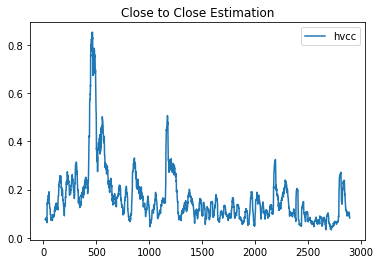

In [16]:
plt.plot(hvcc, label='hvcc')
plt.legend(loc='upper right')
plt.title('Close to Close Estimation')
plt.show()

## Parkson Estimation

Parkinson estimation consists of using logarithmic returns of intra-day high and low asset prices for its calculation. It doesn't take into consideratoin drifts or overnight jumps.

Michael Parkinson "The Extreme Value Method for Estimating the Variance of the Rate of Return"

A disadvantage of using the CCHV is that it does not take into account the information about intraday prices. The Parkinson volatility extends the CCHV by incorporating the stock’s daily high and low prices. It is calculated as follows,

where hi denotes the daily high price, and li is the daily low price.

We implemented the above equation in Python. We downloaded SPY data from Yahoo finance and calculated the Parkinson volatility using the Python program. The picture below shows the Parkinson historical volatility of SPY from March 2015 to March 2020.

Advantages

Using daily ranges seems sensible and provides completely separate information from using time-based  sampling such as closing prices
Disadvantages

It is really only appropriate for measuring the volatility of a GBM process. It cannot handle trends and jumps
It systematically underestimates volatility.


In [18]:
# sqrt(N(4(n(log(2)) * rollSum(log(Hi/Lo)^2, n))))

In [20]:
hvp = np.sqrt(252 / (4 * 21 * np.log(2)) * pd.DataFrame.rolling(np.log(hdata.loc[:,'SPX.High'] / hdata.loc[:, 'SPX.Low']) ** 2, window=21).sum())

In [21]:
hvpe = hvcc ** 2 / hvp ** 2

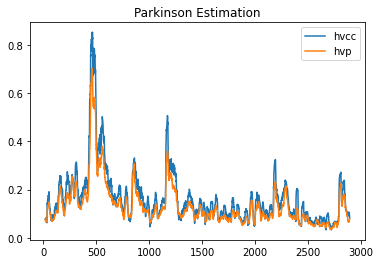

In [25]:
plt.plot(hvcc, label='hvcc')
plt.plot(hvp, label='hvp')
plt.legend(loc='upper right')
plt.title('Parkinson Estimation')
plt.show();

In [ ]:
p